In [95]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [96]:
#importing train data
Train=pd.read_excel('Data_Train.xlsx',parse_dates=['Date_of_Journey'])
Train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [97]:
#importing test data
Test_set=pd.read_excel('Test_set.xlsx')
Test_set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# Exploratory Data Analysis

In [98]:
#finding shape of a data
print(Train.shape)
print(Test.shape)

(10683, 11)
(2671, 10)


In [99]:
#finding first five rows of the train data
Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [100]:
#finding last 5 rows of the train dataset
Train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,2019-09-05,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [101]:
#finding first 5 rows of the test dataset
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [102]:
#finding last 5 rows of the train dataset
Train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,2019-09-05,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [103]:
#checking null values
Train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [104]:
#finding unique value in each column
Train.nunique()

Airline              12
Date_of_Journey      40
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [105]:
#getting info about Train dataset
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


Observation: Here we observe that majority of datatype in object form.

In [106]:
#removing null values
Train.dropna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


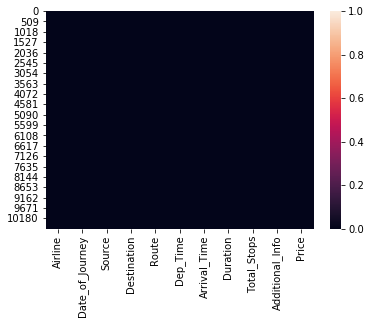

In [107]:
#Visualising null values
sns.heatmap(Train.isnull())

Observation: No null value is present.

In [108]:
#univariable analysis
Train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
42h 45m      1
41h 20m      1
33h 20m      1
19h 50m      1
30h 10m      1
Name: Duration, Length: 368, dtype: int64

# Exploratory Data Analysis

Here in the given data we can see that date and time is a object datatype. So we need to transform the data in proper date_Time format.

In [109]:
#separating month and day from Date_of_Journey column
Train['month']=Train['Date_of_Journey'].dt.month_name()

Train['day']=Train['Date_of_Journey'].dt.day_name()

In [110]:
#checking Train dataset
Train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,January,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,September,Friday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,December,Thursday
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,January,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,September,Wednesday
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,April,Saturday
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,April,Saturday
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,January,Thursday


In [111]:
#As we have extracted information from 'Date of Journey'. So we can drop this column.
Train.drop('Date_of_Journey',axis=1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,January,Saturday
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,September,Friday
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,December,Thursday
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,January,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,September,Wednesday
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,April,Saturday
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,April,Saturday
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,January,Thursday


In [112]:
Train['month']=Train['Date_of_Journey'].dt.month_name()

Train['day']=Train['Date_of_Journey'].dt.day_name()

In [113]:
#extracting hours
Train['Dep_hour']=pd.to_datetime(Train['Dep_Time']).dt.hour

In [114]:
#extracting minutes
Train['Dep_min']=pd.to_datetime(Train['Dep_Time']).dt.minute

In [115]:
Train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,Sunday,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,January,Saturday,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,September,Friday,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,December,Thursday,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,January,Thursday,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,September,Wednesday,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,April,Saturday,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,April,Saturday,8,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,January,Thursday,11,30


In [116]:
#removing repeated columns
Train.drop(['Date_of_Journey','Dep_Time'],axis=1,inplace=True)

In [117]:
Train

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,Sunday,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,January,Saturday,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,September,Friday,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,December,Thursday,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,January,Thursday,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,September,Wednesday,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,April,Saturday,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,April,Saturday,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,January,Thursday,11,30


In [118]:
#extracting hours
Train['Arr_hour']=pd.to_datetime(Train['Arrival_Time']).dt.hour
#extracting minutes
Train['Arr_min']=pd.to_datetime(Train['Arrival_Time']).dt.minute

In [119]:
#removing repeated columns
Train.drop(['Arrival_Time'],axis=1,inplace=True)

In [120]:
Train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,March,Sunday,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,January,Saturday,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,September,Friday,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,December,Thursday,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,January,Thursday,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,September,Wednesday,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,April,Saturday,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,April,Saturday,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,January,Thursday,11,30,14,10


In [121]:
#As we already have arrival and departure hours. so we can drop this column
Train.drop(['Duration'],axis=1,inplace=True)

In [122]:
Train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,March,Sunday,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,January,Saturday,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,September,Friday,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,December,Thursday,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,January,Thursday,16,50,21,35


In [123]:
#handling categorical data
Train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Bivariable Analysis

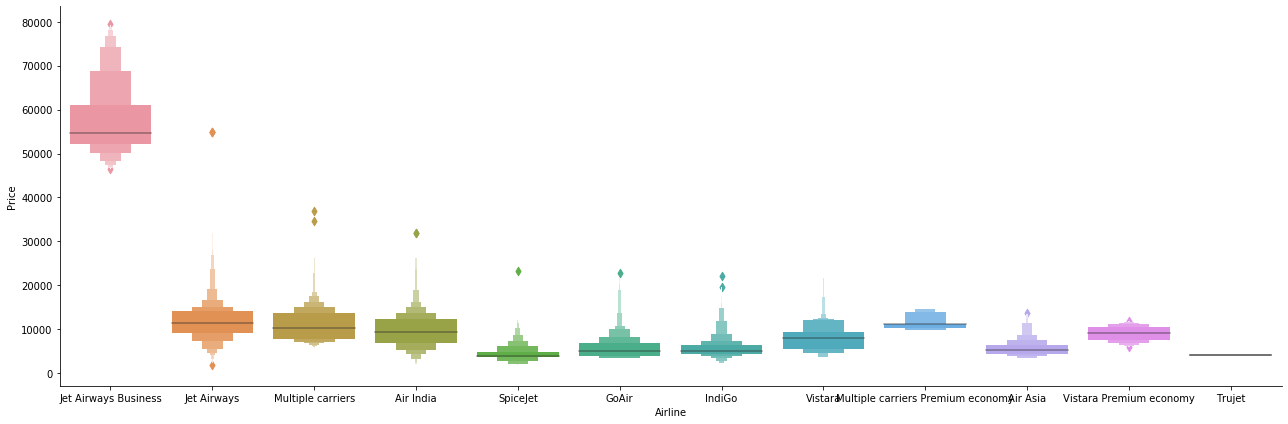

In [31]:
#Airline vs Price

sns.catplot(x='Airline',y='Price',data=Train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

plt.show()

Observation: Here we observe that jet airways have very high prices however all airline are on the same level. So we consider it as normal categorical data. Applying OneHotEncoding.

In [22]:
#As Airline is Normal Categorical data we will perform OneHotEncoding
Airline = Train[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [23]:
#finding flight on different routes
Train['Source'].value_counts()
#Here we can see that maximum route is for delhi

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

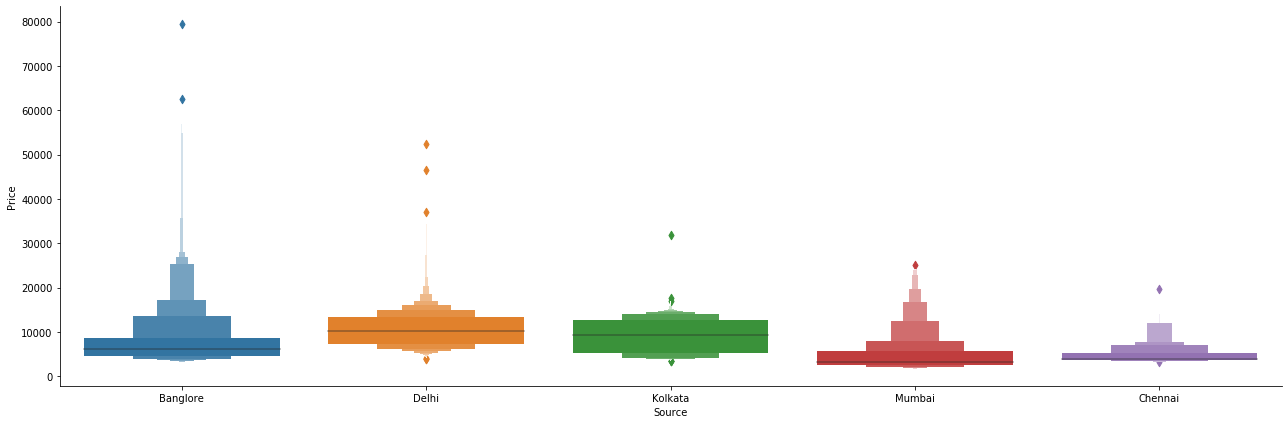

In [24]:
#Source vs Price
sns.catplot(x='Source',y='Price',data=Train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

plt.show()

Observation: Here we can see that the average price of delhi and kolkata is more as compare to others. There are few outliers present in the data.

In [124]:
#As source is Nominal Categorical data we will perform OneHotEncoding
Source= Train[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [125]:
Train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [126]:
#As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=Train[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
Train['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [127]:
#Additional_Info contains almost 80% no_info
#Route and Total_Stops are related to each other

Train.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [128]:
Train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [129]:
#transforming the non-numeric data to numeric data 
Train.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})


,Airline,Source,Destination,Total_Stops,Price,month,day,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,0.0,3897,March,Sunday,22,20,1,10
1,Air India,Kolkata,Banglore,2.0,7662,January,Saturday,5,50,13,15
2,Jet Airways,Delhi,Cochin,2.0,13882,September,Friday,9,25,4,25
3,IndiGo,Kolkata,Banglore,1.0,6218,December,Thursday,18,5,23,30
4,IndiGo,Banglore,New Delhi,1.0,13302,January,Thursday,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,September,Wednesday,19,55,22,25
10679,Air India,Kolkata,Banglore,0.0,4145,April,Saturday,20,45,23,20
10680,Jet Airways,Banglore,Delhi,0.0,7229,April,Saturday,8,20,11,20
10681,Vistara,Banglore,New Delhi,0.0,12648,January,Thursday,11,30,14,10


In [130]:
#concatenate dataframe -->Train + Airline + Source + Destination
Train = pd.concat([Train, Airline, Source, Destination], axis = 1)

In [131]:
Train.head()

,Airline,Source,Destination,Total_Stops,Price,month,day,Dep_hour,Dep_min,Arr_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,non-stop,3897,March,Sunday,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2 stops,7662,January,Saturday,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,September,Friday,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,December,Thursday,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,January,Thursday,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [132]:
#droping repeated columns
Train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [133]:
#transformimg categorical data into int data by using label encoder
from sklearn.preprocessing import LabelEncoder
Train['month']=LabelEncoder().fit_transform(Train['month'])

In [134]:
Train['day']=LabelEncoder().fit_transform(Train['day'])

In [135]:
Train

,Total_Stops,Price,month,day,Dep_hour,Dep_min,Arr_hour,Arr_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,4,3,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,2,2,5,50,13,15,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,6,0,9,25,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,1,4,18,5,23,30,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,2,4,16,50,21,35,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,non-stop,4107,6,6,19,55,22,25,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,non-stop,4145,0,2,20,45,23,20,1,0,...,0,0,0,1,0,0,0,0,0,0
10680,non-stop,7229,0,2,8,20,11,20,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,non-stop,12648,2,4,11,30,14,10,0,0,...,0,0,0,0,0,0,0,0,0,1


In [136]:
Train=Train.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [137]:
Train

,Total_Stops,Price,month,day,Dep_hour,Dep_min,Arr_hour,Arr_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,4,3,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,2,2,5,50,13,15,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,6,0,9,25,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,1,4,18,5,23,30,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,2,4,16,50,21,35,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,6,6,19,55,22,25,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,0.0,4145,0,2,20,45,23,20,1,0,...,0,0,0,1,0,0,0,0,0,0
10680,0.0,7229,0,2,8,20,11,20,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,12648,2,4,11,30,14,10,0,0,...,0,0,0,0,0,0,0,0,0,1


In [138]:
#finding null values
Train.isnull().sum()

Total_Stops                                  1
Price                                        0
month                                        0
day                                          0
Dep_hour                                     0
Dep_min                                      0
Arr_hour                                     0
Arr_min                                      0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkat

In [139]:
#droping null values
Train.dropna(inplace=True)

In [140]:
#As this column is not present in test dataset so we can drop it
Train.drop('Airline_Trujet',axis=1,inplace=True)

In [141]:
#checking null values
Train.isnull().sum()

Total_Stops                                  0
Price                                        0
month                                        0
day                                          0
Dep_hour                                     0
Dep_min                                      0
Arr_hour                                     0
Arr_min                                      0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai

In [142]:
#checking skewness
#We now proceed with treating skewness in our data, which allows us to fit our data in a symmetric distribution, which further allows our model to learn better.

Train.skew()

Total_Stops                                   0.317109
Price                                         1.812405
month                                        -0.340353
day                                          -0.065171
Dep_hour                                      0.112924
Dep_min                                       0.167234
Arr_hour                                     -0.370146
Arr_min                                       0.110945
Airline_Air India                             1.815902
Airline_GoAir                                 7.217685
Airline_IndiGo                                1.562601
Airline_Jet Airways                           0.581943
Airline_Jet Airways Business                 42.164359
Airline_Multiple carriers                     2.461548
Airline_Multiple carriers Premium economy    28.616840
Airline_SpiceJet                              3.185036
Airline_Vistara                               4.399205
Airline_Vistara Premium economy              59.654559
Source_Che

In [143]:
#dividing the data into dependent and independent variable
x=Train.drop(columns=['Price'],axis=1)
y=Train['Price']


In [144]:
#independent variable
x

,Total_Stops,month,day,Dep_hour,Dep_min,Arr_hour,Arr_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,4,3,22,20,1,10,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2.0,2,2,5,50,13,15,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,6,0,9,25,4,25,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,1,4,18,5,23,30,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1.0,2,4,16,50,21,35,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,6,6,19,55,22,25,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,0.0,0,2,20,45,23,20,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10680,0.0,0,2,8,20,11,20,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,2,4,11,30,14,10,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [145]:
#dependent variable
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [146]:
# removing skewness by transforming the data by using standardScaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

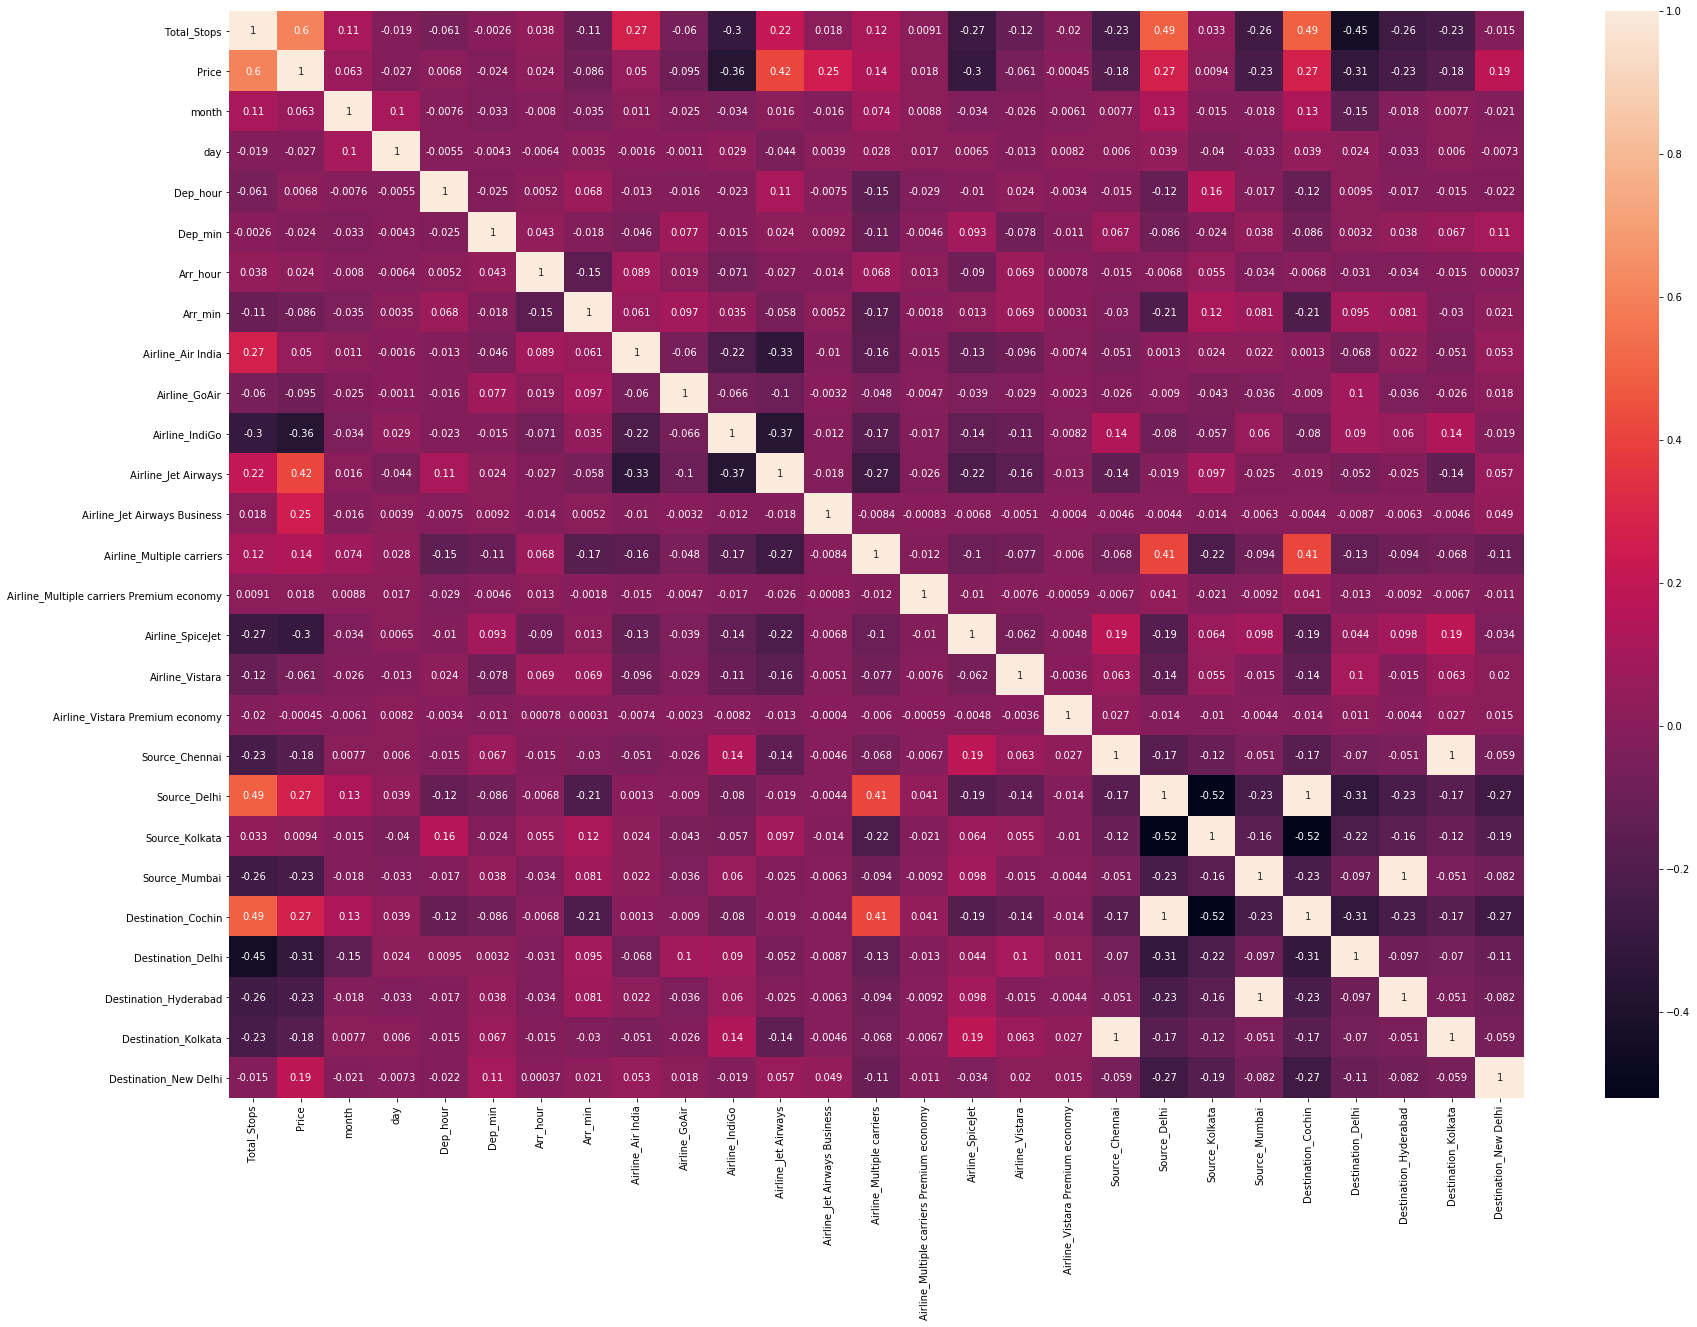

In [147]:
#finding correlation between independent and dependent attributes
plt.figure(figsize=(29,20))
sns.heatmap(Train.corr(),annot=True)

Observation: Here we can see that price is highly correlated with number of stops. More the stops More is the price.

In [63]:
#Here we will find out the random state value with which our linear model will learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [64]:
#finding best randomstate for train test split
def maxr2_score(regr,a,b):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)  
    return final_r_state

In [65]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
r_state=maxr2_score(regr,x,y)

r2 score corresponding to 42 is 0.5914893240707089
r2 score corresponding to 43 is 0.6286935727404896
r2 score corresponding to 44 is 0.6074095878178185
r2 score corresponding to 45 is 0.5145783201451481
r2 score corresponding to 46 is 0.591285561490255
r2 score corresponding to 47 is 0.5480766933787544
r2 score corresponding to 48 is 0.5642679579786782
r2 score corresponding to 49 is 0.5976612482154727
r2 score corresponding to 50 is 0.5437450791014976
r2 score corresponding to 51 is 0.5929115464634869
r2 score corresponding to 52 is 0.5758575982289575
r2 score corresponding to 53 is 0.5900253634740049
r2 score corresponding to 54 is 0.5558598370826717
r2 score corresponding to 55 is -4.419676863094916e+26
r2 score corresponding to 56 is 0.5712515082429188
r2 score corresponding to 57 is 0.663826546362003
r2 score corresponding to 58 is 0.6334492872001247
r2 score corresponding to 59 is 0.6043972214369429
r2 score corresponding to 60 is 0.5987071053394679
r2 score corresponding to 61 

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=0.20)

In [67]:
#lets use grid_search to find optimal value of n_neighbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,20)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 6}

In [68]:
#importing algorithms
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [69]:
#finding best parameter for ridge
alphavalue={'alpha':[0.1,0.01,0.001,0.0001,0]}
rg=Ridge()
grg=GridSearchCV(rg,param_grid=alphavalue)
grg.fit(x,y)
grg.best_params_

{'alpha': 0.1}

In [70]:
#finding best parameter for lasso
alphavalue={'alpha':[0.1,0.01,0.001,0.0001,0]}
las=Lasso()
lasg=GridSearchCV(las,param_grid=alphavalue)
lasg.fit(x,y)
lasg.best_params_

{'alpha': 0.1}

In [71]:
#finding best parameter for randomforestregressor
rfr = RandomForestRegressor()
param_grid = {
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(rfr, param_grid, n_jobs=-1, cv=5)

grid.fit(x, y)
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 30}

In [72]:
#finding best parameter for SVR
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.566987307618497
linear
{'C': 10, 'kernel': 'linear'}


In [73]:
#finding best parameter for adaboost by using grid search cv
from sklearn.ensemble import AdaBoostRegressor
n_estimators={"n_estimators":range(1,25)}
ad=AdaBoostRegressor()
gad=GridSearchCV(ad,n_estimators,cv=10)
gad.fit(x,y)
gad.best_params_

{'n_estimators': 1}

In [74]:
knr=KNeighborsRegressor(n_neighbors=6)
rg=Ridge(alpha=0.1)
las=Lasso(alpha=0.1)
svr=SVR(C= 10, kernel= 'linear')
lr=LinearRegression()
dtr=DecisionTreeRegressor(criterion= 'mse', max_depth= 2, max_leaf_nodes= 5, min_samples_leaf= 20, min_samples_split= 10)
rfr=RandomForestRegressor(bootstrap= True, max_features='auto',min_samples_split= 8,n_estimators=30)
ad=AdaBoostRegressor(n_estimators=1)



In [75]:
#creating model for algorithm
models=[]
models.append(('KNeighborsRegressor',knr))
models.append(('Ridge',rg))
models.append(('Lasso',las))
models.append(('SupportVectorMachine',svr))
models.append(('LinearRegressor',lr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
models.append(('AdaBoostRegressor',ad))

In [76]:
#importing metrics for finding error
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [77]:
#for loop for all the algorithms along with their cross validation
Model=[]
sco=[]
r2score=[]
cvs=[]

for name,model in models:
    print('************',name,'************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train) 
    
    print(model)
    score=model.score(x_train,y_train)
    score1=score.mean()
    pre=model.predict(x_test)
    print('\n')    
    sco.append(score1)
    print('score:',score1)
    MSE=mean_squared_error(y_test,pre)
    print('mean squared error',MSE)
    MAE=mean_absolute_error(y_test,pre)
    print('mean absolute error',MAE)
    R2score= r2_score(y_test,pre)
    print('r2_score',R2score)
    r2score.append(R2score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score=',sc)
    sc1=sc*100
    cvs.append(sc1)
    print('\n')

************ KNeighborsRegressor ************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')


score: 0.7783386324831418
mean squared error 6522052.684643581
mean absolute error 1617.847371704882
r2_score 0.7046575391518736


Cross_Val_Score= 0.7070561472928351


************ Ridge ************


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


score: 0.5809731495903625
mean squared error 7423211.580418017
mean absolute error 1936.3339931836338
r2_score 0.6638497599507236


Cross_Val_Score= 0.594287081545689


************ Lasso ************


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


score: 0.5809731069307459


In [78]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':sco,'r2score':r2score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,r2score,Cross_val_score
0,KNeighborsRegressor,0.778339,70.465754,70.705615
1,Ridge,0.580973,66.384976,59.428708
2,Lasso,0.580973,66.385232,59.428820
3,SupportVectorMachine,0.547500,63.004597,56.660671
4,LinearRegressor,0.580952,66.382655,59.387562
5,DecisionTreeRegressor,0.458186,43.718210,45.769317
6,RandomForestRegressor,0.896862,81.988590,80.252154
7,AdaBoostRegressor,0.522867,61.478809,51.580652


In [79]:
import joblib
joblib.dump(rfr,'flight_price.obj')

['flight_price.obj']

We further proceed to test the object that we saved using joblib, and create a dataframe of predicted values –

In [80]:
rfr=joblib.load('flight_price.obj')
pred= rfr.predict(x_test)
#creating a dataframe with actual and predicted values
predicted_values= pd.DataFrame({'Actual':y_test,'Predicted':pred})

We have achieved an accuracy score value of 89%, meaning that we are actually able to predict values quite near to the actual prices, for majority of the rows

In [81]:

predicted_values

,Actual,Predicted
5530,7832,7810.857143
9361,7480,7378.717531
2189,3873,3878.903822
4670,14871,11946.283869
1815,13470,8035.587507
...,...,...
9380,8016,6755.957999
1866,13381,11830.190542
3902,5678,4494.603978
9201,5000,5626.384479


These are the predictions on the training data, but we also had a test file for which we need to predict the outputs.
We load the test file, apply all the data modeling processes and operations on our test data similar to what we did with the train data, and then make the final prediction using the saved model object.


In [82]:
#loading the saved object
flight_price = joblib.load('flight_price.obj')

In [ ]:
prices=rfr.predict(Test_set)
prices